In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(len(tf.config.list_physical_devices('GPU')))
print(tf.__version__) # tensorflow 버전 확인

0
2.16.1


In [12]:
fashion_mnist = keras.datasets.fashion_mnist    # fashion MNIST 데이터셋
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()   # 데이터셋 불러오기
_, img_height, img_width = train_images.shape   # 영상의 크기 받아오기
num_classes = 10    # 10개의 클래스
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',   # 10개의 클래스 이름들 (시각화 시 사용)
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('train images shape', train_images.shape)
print('train labels length', len(train_labels))
print('train labels', train_labels)
print('test images shape', test_images.shape)
print('test labels length', len(test_labels))

train images shape (60000, 28, 28)
train labels length 60000
train labels [9 0 0 ... 3 0 5]
test images shape (10000, 28, 28)
test labels length 10000


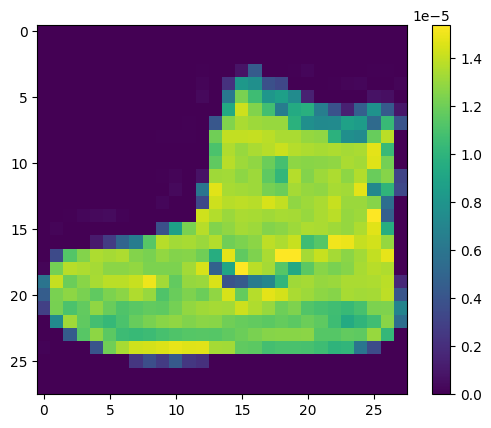

C:\Users\20240001\AppData\Local\Temp\ipykernel_4228\1199887793.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(train_images[i], cmap=plt.cm.get_cmap('binary'))  # i번째 학습 샘플을 흑백 색상으로 보이기


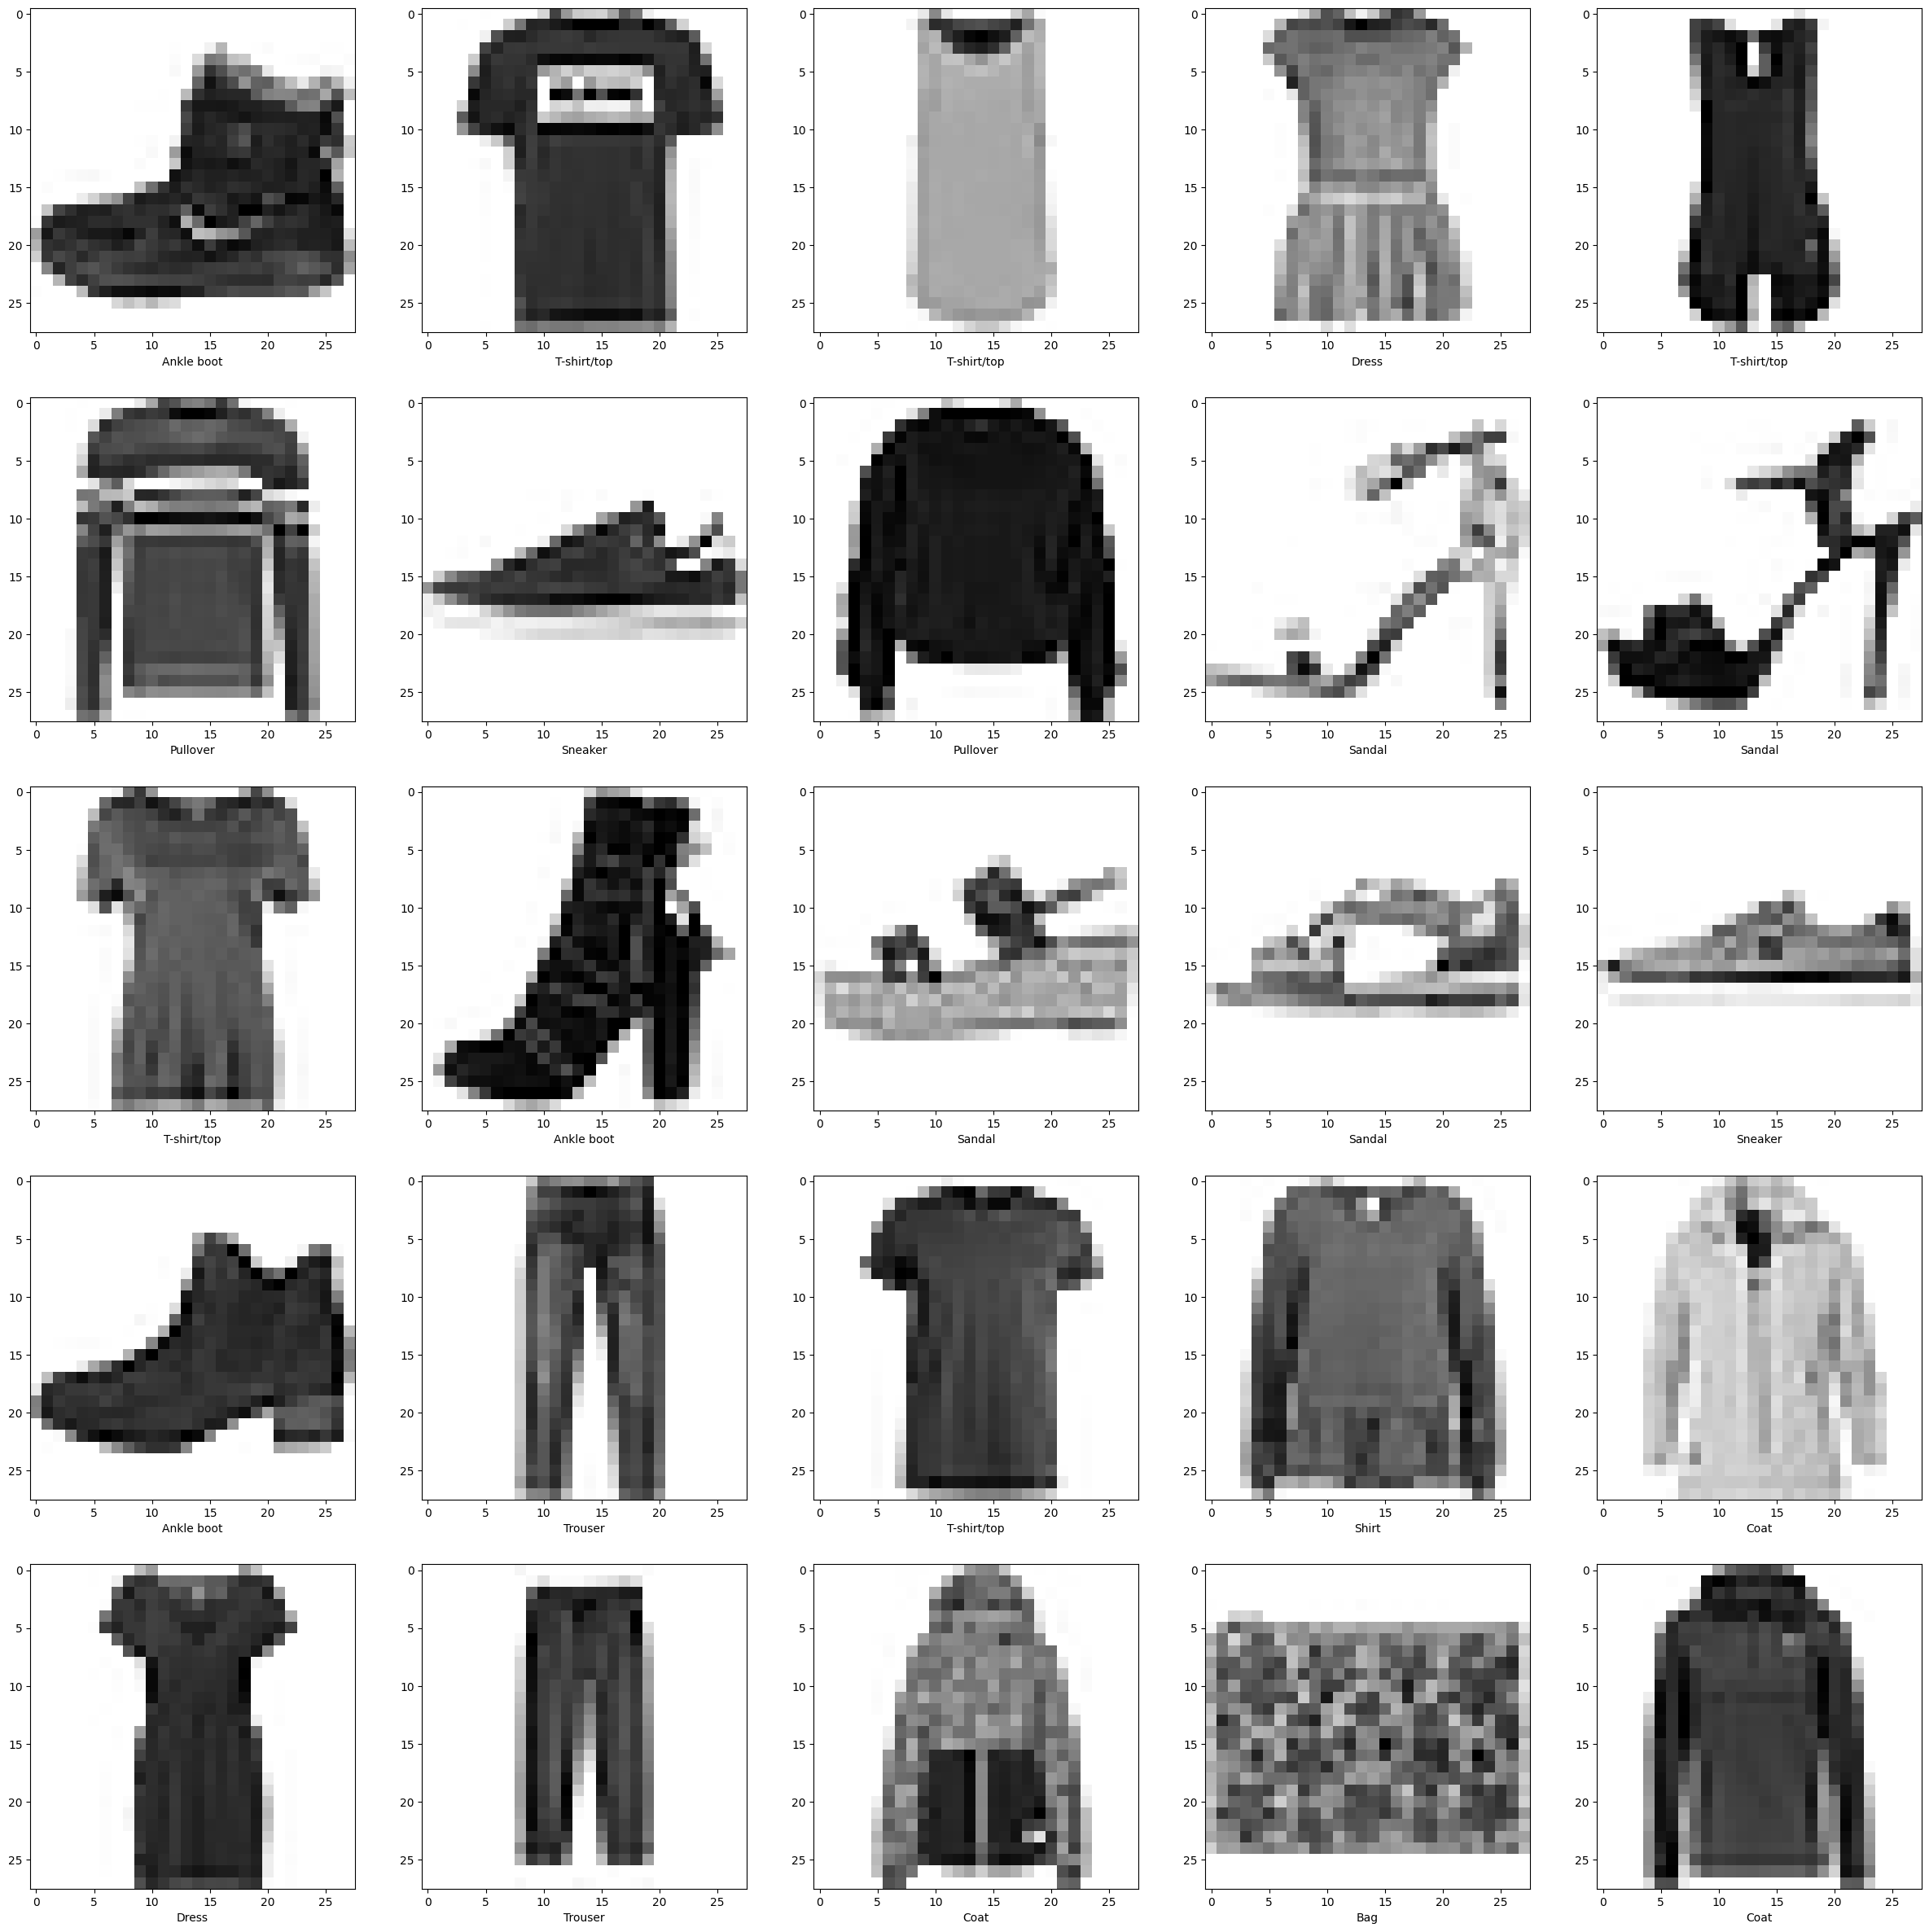

In [16]:
plt.figure()                            # Figure 시각화 창 생성
plt.imshow(train_images[0])             # 0번째 training image 보이기
plt.colorbar()                          # 화소값에 대한 범례 보이기
plt.show()

train_images = train_images / 255.0     # 데이터 범위를 [0, 1]로 정규화
test_images = test_images / 255.0       # 학습 데이터와 동일하게 정규화하는 것이 중요

plt.figure(figsize=(30,30))             # 적당한 크기의 Figure 창 생성
for i in range(25):                     # 25장의 이미지 시각화
    plt.subplot(5, 5, i+1)              # 5 x 5 로 이미지 그리드에 한 개씩 시각화
    plt.imshow(train_images[i], cmap=plt.cm.get_cmap('binary'))  # i번째 학습 샘플을 흑백 색상으로 보이기 
    plt.xlabel(class_names[train_labels[i]])                     # x 축 이름을 i번째 학습 샘플의 label로 붙이기
plt.show()                                                       # 준비된 plt을 보이기


In [17]:
# 첫번째 분류 네트워크 : Dense Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_height, img_width)), # 28 x 28 입력을 784차원 벡터로 평탄화 (벡터화)
    keras.layers.Dense(128, activation='relu'),                # 조밀층, ReLU 활성화 함수 적용
    keras.layers.Dense(num_classes, activation='softmax')      # 조밀층, class 갯수에 맞추어 softmax 활성화 함수 적용
])                                                             # class별 확률을 출력


model.compile(optimizer='adam',                                # Adam 최적화 기법 사용
              loss='sparse_categorical_crossentropy',          # Sparse Categorical Cross-Entropy 비용함수 사용
              metrics=['accuracy'])                            # 평가지표로 정확도 사용

model.summary()

C:\Users\20240001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(train_images, train_labels, epochs=10)             # 학습 데이터 입력 x = training_images
                                                            # 학습 데이터 정답 y = training_labels
                                                            # epoch = 전체 데이터셋을 학습하는 횟수

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0987 - loss: 2.3028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0977 - loss: 2.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0962 - loss: 2.3028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0986 - loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: 2.3028
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0981 - loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0962 - loss: 2.3028
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1006 - loss: 2.3027
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0979 - loss: 2.3027
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1018 - loss: 2.3027


In [21]:
est_loss, test_acc = model.evaluate(test_images, test_labels)  # 정량적 평가 시에는 model.evaluate 사용
                                                                # model.compile 시 추가한 metric을 계산해 준다.
print('\n테스트 정확도:', test_acc)                               # test accuracy를 출력

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0998 - loss: 2.3028

테스트 정확도: 0.10000000149011612


In [22]:
predictions = model.predict(test_images)  # test 영상에 대해 결과를 추정할 때

print(np.shape(predictions))
print(predictions[0])               # 0번째 test 샘플에 대한 신경망의 추정값 = 클래스 확률
print(np.argmax(predictions[0]))    # 0번째 test 샘플에 대해 클래스 확률이 가장 높은 클래스

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(10000, 10)
[0.09687138 0.10033049 0.10138135 0.10067705 0.09795573 0.10027006
 0.10137775 0.10021972 0.10183983 0.09907663]
8
